In [57]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [58]:
path = "Despesas_Cefisma_set2016.xls"

In [61]:
raw = pd.read_excel(path, sheetname=None)
new_raw = {'nome': [], 'valor':[], 'data': [], 'direcao':[], 'tipo':[],
           'ano':[], 'mes':[], 'dia':[]}

In [62]:
for k in raw.keys():
    temp_raw = raw[k]
    for t in temp_raw.iterrows():
        t = t[1]
        datetim = t.Data
        new_raw['data'].append(datetim)
        new_raw['ano'].append(datetim.year)
        new_raw['mes'].append(datetim.month)
        new_raw['dia'].append(datetim.day)
        new_raw['nome'].append(t.Nome)
        new_raw['valor'].append(t.Valor)
        new_raw['direcao'].append(t['Débito/Crédito'])
        new_raw['tipo'].append(k)

In [73]:
new_raw = pd.DataFrame(new_raw)
new_raw = new_raw.sort_values("data")
new_raw.to_csv("cefisma.csv", index=False)
new_raw = pd.read_csv("cefisma.csv")

In [78]:
dat = new_raw

In [102]:
i = []
j = 0
dt = []
rec = []
des = []
for a in np.unique(dat.ano):
    dat_a = dat[dat.ano == a]
    for m in np.unique(dat_a.mes):
        dat_m = dat_a[dat_a.mes == m]
        receitas = np.sum(dat_m[dat_m.direcao == "Crédito"])
        despesas = np.sum(dat_m[dat_m.direcao == "Débito"])
        dt.append(str(a) + "-" + str(m))
        rec.append(np.sum(receitas.valor))
        des.append(np.sum(despesas.valor))
        j += 1
        i.append(j)

<IPython.core.display.Javascript object>


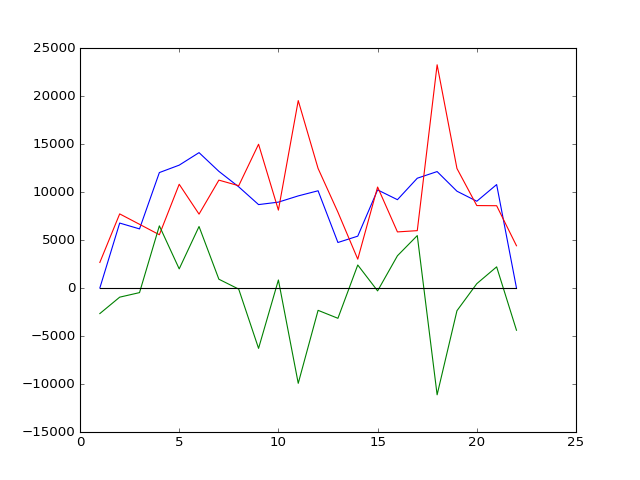

In [111]:
plt.plot(i, rec, 'b')
plt.plot(i, des, 'r')
plt.plot(i, np.array(rec)-np.array(des), 'g')
plt.plot(i, np.zeros(len(i)), 'k')
plt.show()

In [107]:
dt[17]

'2016-5'

In [112]:
np.mean(rec)

8859.1727272727276

In [113]:
np.mean(des)

9478.0159545454535